# PEC 2 Asignatura Aprendizaje Automático Aplicado

## Máster en Data Science - UCJC

### Curso 2023/2024

Profesor: Francisco Lamas López - francisco.lamas@ucjc.edu

- Fecha de entrega a los alumnos: miércoles **17ENE2024**


- Fecha límite de entrega de soluciones: miércoles **07FEB2024**


- Fecha orientativa de correcciones: miércoles **21FEB2024**

### INSTRUCCIONES:

Resolver individualmente las siguientes 12 preguntas (cada una de las cuales tiene idéntica valoración, 1/12 del total)


Se dará una puntuación sobre 10 a cada alumno para esta PEC2 (75% del total de PEC's)


Rellenar sobre este Notebook (entregar como archivo .ipynb)

**Aspectos importantes a tener en cuenta:**

- Seguir los pasos recomendados en cada una de las 12 preguntas (como listas de ítems en el markdown), ya que os servirán como guía para resolverlas

- Intentar siempre, en la parte de análisis y comparación, plotear y exponer gráficos cuando sea posible sobre los resultados obtenidos

- Comentar y argumentar los resultados obtenidos

**En caso de no poder entregarla a través del BlackBoard, enviar antes de la fecha límite al email francisco.lamas@ucjc.edu (explicar en el email error obtenido durante la subida a BlackBoard)**

### ALUMNO (APELLIDOS, NOMBRE):

ROSALES RAMÍREZ WILLIAM DAVID

### EMAIL ALUMNO:

rosales.william1993@gmail.com

#### Uso de Datasets en la PEC2

En esta práctica, se deben utilizar los datasets que se especifiquen en los ejercicios del Conjunto 2, 3 y 4 (preguntas 4 a 12). Utilice datasets a elección del alumno en las preguntas 1, 2 y 3.

## Conjunto 1

### Pregunta 1

Evalúa al menos 3 modelos de clasificación supervisada (SVC, Regresor Logístico, KNN Classifier... por ejemplo) con distintos repartos de train-test y haciendo Cross-Validation sobre ellos. Busca una combinación de hiperarámetros óptima para cada uno de ellos para distintos test_sizes entre 0.1 y 0.4. Razonar cual sería el modelo que mejor generaliza los resultados, entre los entrenamientos realizados.

In [131]:
#Importamos las librerías estandar que vamos a usar en nuestros ejercicios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import time
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import Voronoi
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Primero cargamos el dataset de cancer de seno y lo separamos en X e y
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

#Ya que tenemos nuestros X e y vamos a separar los conjuntos de entrenamiento y de prueba en una proporción de 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#Ahora empezamos a entrenar los modelos, cada uno con un cross validation de 5 y con hiperparámetros por defecto

#Modelo SVC
svc_model = SVC()
svc_scores = cross_val_score(svc_model, X_train, y_train, cv=5)
svc_accuracy = svc_scores.mean()

#Modelo de regresión logística
logistic_model = LogisticRegression()
logistic_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)
logistic_accuracy = logistic_scores.mean()

#Modelo KNN
knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
knn_accuracy = knn_scores.mean()

#Una vez tenemos los modelos entrenados vemos la precision obtenida en cada uno de ellos
print(f'Modelo SVC - Accuracy: {svc_accuracy:.3f}')
print(f'Modelo de regresión logística - Accuracy: {logistic_accuracy:.3f}')
print(f'Modelo KNN - Accuracy: {knn_accuracy:.3f}')


Modelo SVC - Accuracy: 0.903
Modelo de regresión logística - Accuracy: 0.938
Modelo KNN - Accuracy: 0.923


In [4]:
#Para comparar cada uno de los mejores parámetros obtenidos en cada tamaño de entrenamiento vamos a generar listas
#las cuales van a contener el valor resultado respectivo.
svc_accuracies = []
logistic_accuracies = []
knn_accuracies = []

#Creamos una lista con cada uno de los porcentajes de test size
test_sizes = [0.1, 0.2, 0.3, 0.4]

#Ya con nuestras listas vamos a generar un loop for el cual toma cada valor de nuestros tamaños de conjunto de prueba
for test_size in test_sizes:
    
    #Realiza la división de los datos con el test size seleccionado en el bucle for con su respectiva semilla
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    #Instanciamos el modelo SVC
    svc_model = SVC()
    #Indicamos los valores que va a usar Grid Search para probar el mejor modelo
    svc_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    #Corremos nuestro Grid Search
    svc_grid_search = GridSearchCV(svc_model, svc_param_grid, cv=5)
    #Con nuestro Grid Search ajustamos los datos de entrenamiento
    svc_grid_search.fit(X_train, y_train)
    #Visualizamos los mejores parámetros obtenidos por el Grid Search
    svc_best_params = svc_grid_search.best_params_
    #Obtenemos el accuracy score de los mejores parámetros obtenidos 
    svc_accuracy = svc_grid_search.best_score_
    #Añadimos el valor del accuracy a la lista que creamos previamente
    svc_accuracies.append(svc_accuracy)

    #Realizamos los mismos pasos anteriores pero con la regresión logística
    logistic_model = LogisticRegression()
    logistic_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5)
    logistic_grid_search.fit(X_train, y_train)
    logistic_best_params = logistic_grid_search.best_params_
    logistic_accuracy = logistic_grid_search.best_score_
    logistic_accuracies.append(logistic_accuracy)

    #Terminamos con KNN
    knn_model = KNeighborsClassifier()
    knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
    knn_grid_search.fit(X_train, y_train)
    knn_best_params = knn_grid_search.best_params_
    knn_accuracy = knn_grid_search.best_score_
    knn_accuracies.append(knn_accuracy)

    #Veamos los resultados de cada uno de los tamaños de set de entrenamiento que está corriendo el bucle for
    print(f'\nTest Size: {test_size}')
    print(f'Support Vector Classifier (SVC) - Best Params: {svc_best_params}, Accuracy: {svc_accuracy:.3f}')
    print(f'Regresión Logística - Best Params: {logistic_best_params}, Accuracy: {logistic_accuracy:.3f}')
    print(f'K-Nearest Neighbors (KNN) - Best Params: {knn_best_params}, Accuracy: {knn_accuracy:.3f}')



Test Size: 0.1
Support Vector Classifier (SVC) - Best Params: {'C': 10, 'kernel': 'linear'}, Accuracy: 0.961
Regresión Logística - Best Params: {'C': 1, 'penalty': 'l2'}, Accuracy: 0.939
K-Nearest Neighbors (KNN) - Best Params: {'n_neighbors': 5, 'weights': 'uniform'}, Accuracy: 0.934

Test Size: 0.2
Support Vector Classifier (SVC) - Best Params: {'C': 1, 'kernel': 'linear'}, Accuracy: 0.956
Regresión Logística - Best Params: {'C': 10, 'penalty': 'l2'}, Accuracy: 0.947
K-Nearest Neighbors (KNN) - Best Params: {'n_neighbors': 7, 'weights': 'distance'}, Accuracy: 0.925

Test Size: 0.3
Support Vector Classifier (SVC) - Best Params: {'C': 10, 'kernel': 'linear'}, Accuracy: 0.962
Regresión Logística - Best Params: {'C': 10, 'penalty': 'l2'}, Accuracy: 0.947
K-Nearest Neighbors (KNN) - Best Params: {'n_neighbors': 5, 'weights': 'uniform'}, Accuracy: 0.915

Test Size: 0.4
Support Vector Classifier (SVC) - Best Params: {'C': 10, 'kernel': 'linear'}, Accuracy: 0.959
Regresión Logística - Best 


Accuracy de SVC: [0.9608985341709501, 0.956043956043956, 0.9622784810126582, 0.9589087809036659]
Accuracy de Regresión Logística: [0.9394441271654295, 0.9472527472527472, 0.9471835443037975, 0.9355498721227622]
Accuracy de KNN: [0.9335237007424328, 0.9252747252747253, 0.9145253164556962, 0.9003410059676045]


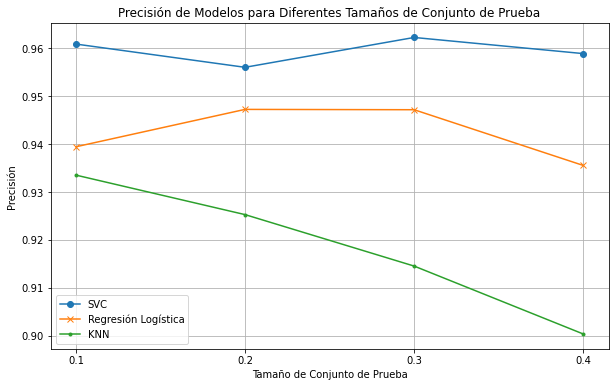

In [5]:
#Veamos la lista de los valores obtenidos en la celda anterior y que se guardaron en las listas creadas
print("\nAccuracy de SVC:", svc_accuracies)
print("Accuracy de Regresión Logística:", logistic_accuracies)
print("Accuracy de KNN:", knn_accuracies)


#Para obtener una conclusión de forma mas visual vamos a graficar los resultados
#Definimos el tamaño de nuestra figura
plt.figure(figsize=(10, 6))

#Definimos cada punto que va a generar las lineas y les asignamos una etiqueta
plt.plot(test_sizes, svc_accuracies, marker='o', label='SVC')
plt.plot(test_sizes, logistic_accuracies, marker='x', label='Regresión Logística')
plt.plot(test_sizes, knn_accuracies, marker='.', label='KNN')

#Damos nombres a los ejes y el título
plt.title('Precisión de Modelos para Diferentes Tamaños de Conjunto de Prueba')
plt.xlabel('Tamaño de Conjunto de Prueba')
plt.ylabel('Precisión')
plt.xticks(test_sizes)
plt.grid(True)
plt.legend()
plt.show()


Como podemos ver despues de realizar el entrenamiento de los distintos modelos de clasificación, y de obtener los mejores parámetros para cada uno de los tamaños de conjunto de entrenamiento podemos concluir:

Para el modelo SVC notamos que el tamaño de conjunto de entrenamieto óptimo es 0.30 ya que es el mayor de todos, tambien vemos que un mayor conjunto de entrenamiento no es necesariamente óptimo puesto que de 0.1 a 0.2 existío una reduccíon en la precisión del modelo y para 0.4 este valor vuelve a bajar

En la Regresión Logística por el contrario vemos que no existe diferencia en el rendimiento del modelo entre 0.2 y 0.3 como tamaño de conjunto de prueba, sin embar despues de esto el modelo presenta un descenso en la precisión

Por último el modelo KNN es el que peor se ha comportado con el incremento de tamaño del conjunto de prueba, reduciendo su accuracy en cada incremento que obtuvo

Viendo el gráfico anterior podemos afirmar que el modelo SVC con un conjunto de prueba de 0.3, con C = 10 y kernel = "linear" es el que mejor generaliza con los datos de entrenamiento

### Pregunta 2

Realiza al menos 2 transformaciones de reducción de dimensionalidad sobre el Dataset utilizando un mismo algoritmo (p.e. PCA). Evalúe las diferencias de entrenar un modelo de clasificación (como los utilizados al principio de la PEC2) con todo el Dataset, o con el Dataset reducido a diferentes dimensiones. Graficar los resultados y evaluar el tiempo de computación de entrenamiento de modelos. No olvides el efecto de escalar los datos previamente a aplicar el PCA. Justificar los resultados encontrados.

Graficar los resultados y comentar las diferencias de entrenar y evaluar el modelo sobre el Dataset transformado con sus dimensiones reducidas. Ejecuta diferentes visualizaciones de los datos tratados.

In [6]:
#Para esto primero cargamos el dataset y lo dividimos en X e y
wine = load_wine()
X, y = wine.data, wine.target

In [7]:
#Una vez divididos nuestros datos y objetivo, separamos nuestros conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Instanciamos el escalador
scaler = StandardScaler()

#Entrenamos el escalador y escalamos los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

#Con el escalador ajustado escalamos los datos de prueba 
X_test_scaled = scaler.transform(X_test)

In [9]:
#Para el ejercicio vamos a aplicar PCA a los datos y vamos a hacer dos escalamientos
#Primero escalamos con dos componentes
pca_2 = PCA(n_components=2)
wine_train_pca_2 = pca_2.fit_transform(X_train_scaled)
wine_test_pca_2 = pca_2.transform(X_test_scaled)

#Despues escalamos con tres componentes
pca_3 = PCA(n_components=3)
wine_train_pca_3 = pca_3.fit_transform(X_train_scaled)
wine_test_pca_3 = pca_3.transform(X_test_scaled)


In [10]:
#Instanciamos nuestros modelos a entrenar, con sus hiperparámetros por defecto
svc_model = SVC()
knn_model = KNeighborsClassifier()
logistic_model = LogisticRegression()

In [11]:
#Creamos listas que nos permitirán guardar los valores que obtenemos del classification report
precision_scores = []
recall_scores = []
f1_scores = []
training_times = []


#Para poder automatizar el proceso de entrenamiento de nuestros modelos vamos a crear una función
#definimos la función que recibe los datos de entrenamiento, de prueba y el modelo a entrenar
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
    #Tomamos el tiempo de inicio de nuestra función
    start_time = time.time()
    #Entrenamos nuestro modelo
    model.fit(X_train, y_train)
    #Realizamos una predición
    y_pred = model.predict(X_test)
    #Tomamos el tiempo en el que se detiene la función
    end_time = time.time()
    
    #Con esto vamos a crear un diccionario llamado report a partir del classification report y vamos a tomar como clave
    #la métrica promediada y como valor la métrica que deseamos y la agregamos a la lista vacía creada con append 
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    
    #Realizamos lo mísmo que con las métricas pero en este caso con la diferencia entre el tiempo de inicio y el
    #tiempo final de la función
    training_times.append(end_time - start_time)

#Entrenamos el modelo SVC con cada uno de nuestros datasets: original, PCA 2 dimensiones y PCA 3 dimensiones
train_and_evaluate(X_train, y_train, X_test, y_test, svc_model)
train_and_evaluate(wine_train_pca_2, y_train, wine_test_pca_2, y_test, svc_model)
train_and_evaluate(wine_train_pca_3, y_train, wine_test_pca_3, y_test, svc_model)


#Entrenamos el modelo KNN con cada uno de nuestros datasets: original, PCA 2 dimensiones y PCA 3 dimensiones
train_and_evaluate(X_train, y_train, X_test, y_test, knn_model)
train_and_evaluate(wine_train_pca_2, y_train, wine_test_pca_2, y_test, knn_model)
train_and_evaluate(wine_train_pca_3, y_train, wine_test_pca_3, y_test, knn_model)


#Entrenamos el modelo SVC con cada uno de nuestros datasets: original, PCA 2 dimensiones y PCA 3 dimensiones
train_and_evaluate(X_train, y_train, X_test, y_test, logistic_model)
train_and_evaluate(wine_train_pca_2, y_train, wine_test_pca_2, y_test, logistic_model)
train_and_evaluate(wine_train_pca_3, y_train, wine_test_pca_3, y_test, logistic_model)


Precision para modelo SVC con el dataset original 0.8011
Precision para modelo SVC con PCA 2 dimensiones 1.0
Precision para modelo SVC con PCA 3 dimensiones 1.0
Precision para modelo KNN con el dataset original 0.7222
Precision para modelo KNN con PCA 2 dimensiones 1.0
Precision para modelo KNN con PCA 3 dimensiones 0.9753
Precision para modelo regresion logística con el dataset original 0.9741
Precision para modelo regresion logística 2 dimensiones 1.0
Precision para modelo regresion logística 3 dimensiones 0.9741


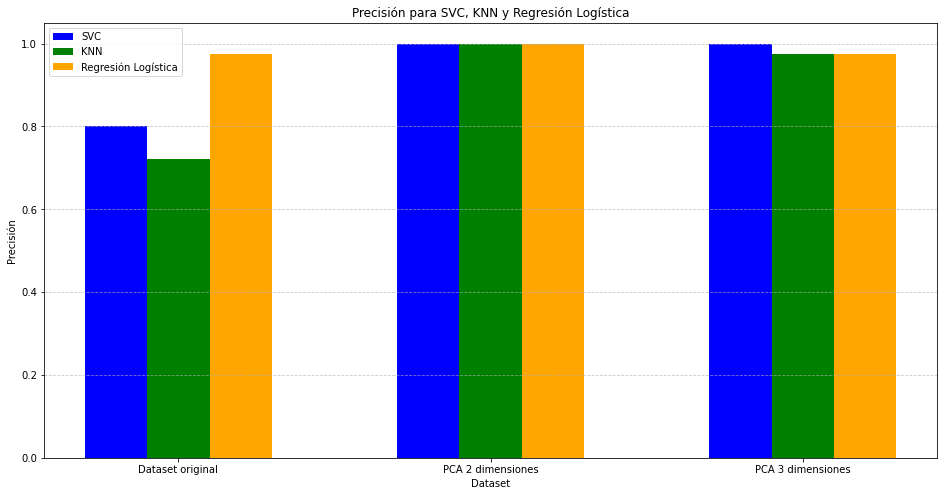

In [12]:
#Vamos a ver los resultados en cuanto a la precisión de nuestros modelos, iniciamos viendo un listado
#de como se comportó cada modelo y en cada uno de los datasets

print("Precision para modelo SVC con el dataset original", round(precision_scores[0],4))
print("Precision para modelo SVC con PCA 2 dimensiones", round(precision_scores[1],4))
print("Precision para modelo SVC con PCA 3 dimensiones", round(precision_scores[2],4))
print("Precision para modelo KNN con el dataset original", round(precision_scores[3],4))
print("Precision para modelo KNN con PCA 2 dimensiones", round(precision_scores[4],4))
print("Precision para modelo KNN con PCA 3 dimensiones", round(precision_scores[5],4))
print("Precision para modelo regresion logística con el dataset original", round(precision_scores[6],4))
print("Precision para modelo regresion logística 2 dimensiones", round(precision_scores[7],4))
print("Precision para modelo regresion logística 3 dimensiones", round(precision_scores[8],4))

#Ahora que ya sabemos el valor de cada entrenamiento, los guardamos en nuevas listas dependiendo del modelo entrenado
svc_precision = precision_scores[:3]
knn_precision = precision_scores[3:6]
logistic_precision = precision_scores[6:]

#Establecemos el tamaño del gráfico
plt.figure(figsize=(16, 8))

#Establecemos las características de las columnas
bar_width = 0.2
index = np.arange(3)

#Dibujamos cada una de las barras que van a representar nuestros modelos
plt.bar(index, svc_precision, bar_width, color='blue', label='SVC')
plt.bar(index + bar_width, knn_precision, bar_width, color='green', label='KNN')
plt.bar(index + 2*bar_width, logistic_precision, bar_width, color='orange', label='Regresión Logística')

#Asignamos las etiquetas de ejes y el título del gráfico
plt.xlabel('Dataset')
plt.ylabel('Precisión')
plt.title('Precisión para SVC, KNN y Regresión Logística')

#Mostramos las leyendas para cada uno de nuestros modelos
plt.legend()

#Ponemos las etiquetas de cada dataset usado que agrupa a cada modelo entrenado
plt.xticks(index + bar_width, ['Dataset original', 'PCA 2 dimensiones', 'PCA 3 dimensiones'])

#Mostramos el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Podemos ver que haciendo PCA con dos dimensiones obtenemos una precision perfecta con los tres modelos, mientras que el dataset original muestr un rendimiento mucho peor, casi alcanzado por la regresión logística

Recall para modelo SVC con el dataset original 0.8056
Recall para modelo SVC con PCA 2 dimensiones 1.0
Recall para modelo SVC con PCA 3 dimensiones 1.0
Recall para modelo KNN con el dataset original 0.7222
Recall para modelo KNN con PCA 2 dimensiones 1.0
Recall para modelo KNN con PCA 3 dimensiones 0.9722
Recall para modelo regresion logística con el dataset original 0.9722
Recall para modelo regresion logística 2 dimensiones 1.0
Recall para modelo regresion logística 3 dimensiones 0.9722


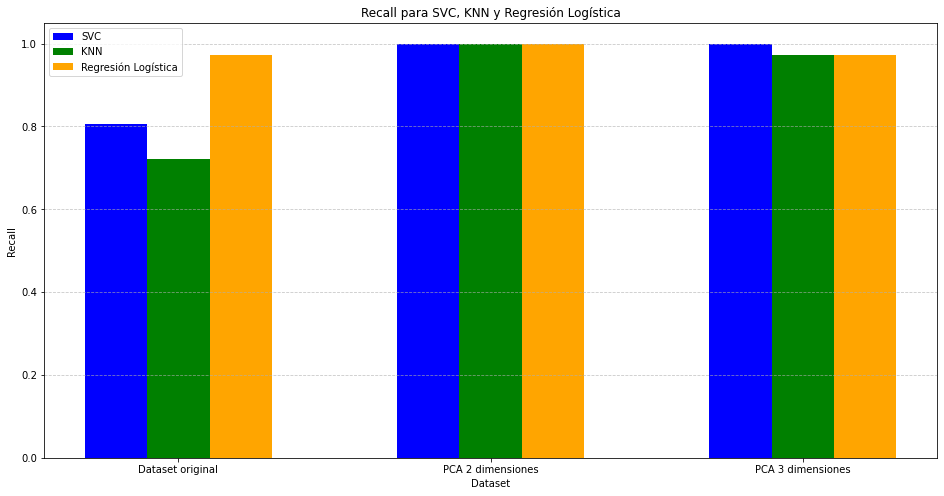

In [13]:
#Realizamos el mismo procedimiento con el recall

print("Recall para modelo SVC con el dataset original", round(recall_scores[0],4))
print("Recall para modelo SVC con PCA 2 dimensiones", round(recall_scores[1],4))
print("Recall para modelo SVC con PCA 3 dimensiones", round(recall_scores[2],4))
print("Recall para modelo KNN con el dataset original", round(recall_scores[3],4))
print("Recall para modelo KNN con PCA 2 dimensiones", round(recall_scores[4],4))
print("Recall para modelo KNN con PCA 3 dimensiones", round(recall_scores[5],4))
print("Recall para modelo regresion logística con el dataset original", round(recall_scores[6],4))
print("Recall para modelo regresion logística 2 dimensiones", round(recall_scores[7],4))
print("Recall para modelo regresion logística 3 dimensiones", round(recall_scores[8],4))


svc_recall = recall_scores[:3]
knn_recall = recall_scores[3:6]
logistic_recall = recall_scores[6:]


plt.figure(figsize=(16, 8))


bar_width = 0.2
index = np.arange(3)


plt.bar(index, svc_recall, bar_width, color='blue', label='SVC')
plt.bar(index + bar_width, knn_recall, bar_width, color='green', label='KNN')
plt.bar(index + 2*bar_width, logistic_recall, bar_width, color='orange', label='Regresión Logística')


plt.xlabel('Dataset')
plt.ylabel('Recall')
plt.title('Recall para SVC, KNN y Regresión Logística')


plt.legend()


plt.xticks(index + bar_width, ['Dataset original', 'PCA 2 dimensiones', 'PCA 3 dimensiones'])


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observamos un resultado prácticamente idéntico con el recall para los tres modelos empleados y nuevamente el modelo que presenta mas consistencia es la regresión logística.

F1-score para modelo SVC con el dataset original 0.8024
F1-score para modelo SVC con PCA 2 dimensiones 1.0
F1-score para modelo SVC con PCA 3 dimensiones 1.0
F1-score para modelo KNN con el dataset original 0.7222
F1-score para modelo KNN con PCA 2 dimensiones 1.0
F1-score para modelo KNN con PCA 3 dimensiones 0.9725
F1-score para modelo regresion logística con el dataset original 0.9722
F1-score para modelo regresion logística 2 dimensiones 1.0
F1-score para modelo regresion logística 3 dimensiones 0.9722


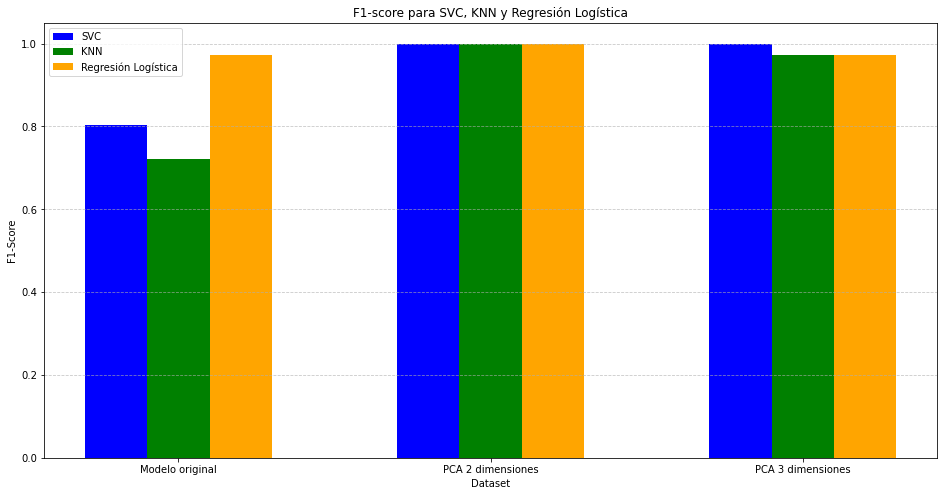

In [14]:
#Volvemos a repetir el mismo procedimiento con el F1-score 

print("F1-score para modelo SVC con el dataset original", round(f1_scores[0],4))
print("F1-score para modelo SVC con PCA 2 dimensiones", round(f1_scores[1],4))
print("F1-score para modelo SVC con PCA 3 dimensiones", round(f1_scores[2],4))
print("F1-score para modelo KNN con el dataset original", round(f1_scores[3],4))
print("F1-score para modelo KNN con PCA 2 dimensiones", round(f1_scores[4],4))
print("F1-score para modelo KNN con PCA 3 dimensiones", round(f1_scores[5],4))
print("F1-score para modelo regresion logística con el dataset original", round(f1_scores[6],4))
print("F1-score para modelo regresion logística 2 dimensiones", round(f1_scores[7],4))
print("F1-score para modelo regresion logística 3 dimensiones", round(f1_scores[8],4))


svc_f1 = f1_scores[:3]
knn_f1 = f1_scores[3:6]
logistic_f1 = f1_scores[6:]


plt.figure(figsize=(16, 8))


bar_width = 0.2
index = np.arange(3)


plt.bar(index, svc_f1, bar_width, color='blue', label='SVC')
plt.bar(index + bar_width, knn_f1, bar_width, color='green', label='KNN')
plt.bar(index + 2*bar_width, logistic_f1, bar_width, color='orange', label='Regresión Logística')


plt.xlabel('Dataset')
plt.ylabel('F1-Score')
plt.title('F1-score para SVC, KNN y Regresión Logística')


plt.legend()


plt.xticks(index + bar_width, ['Modelo original', 'PCA 2 dimensiones', 'PCA 3 dimensiones'])


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Por último para la métrica F1 podemos observar los mismos resultados que en las primeras dos métricas obteniendo mayor consistencia en la regresión logística y la regresión logistica se confirma como el modelo mas consistente

Tiempo de entrenamiento para modelo SVC con el dataset original 0.002
Tiempo de entrenamiento para modelo SVC con PCA 2 dimensiones 0.001
Tiempo de entrenamiento para modelo SVC con PCA 3 dimensiones 0.001
Tiempo de entrenamiento para modelo KNN con el dataset original 0.004
Tiempo de entrenamiento para modelo KNN con PCA 2 dimensiones 0.002
Tiempo de entrenamiento para modelo KNN con PCA 3 dimensiones 0.002
Tiempo de entrenamiento para modelo regresion logística con el dataset original 0.017
Tiempo de entrenamiento para modelo regresion logística 2 dimensiones 0.004
Tiempo de entrenamiento para modelo regresion logística 3 dimensiones 0.004


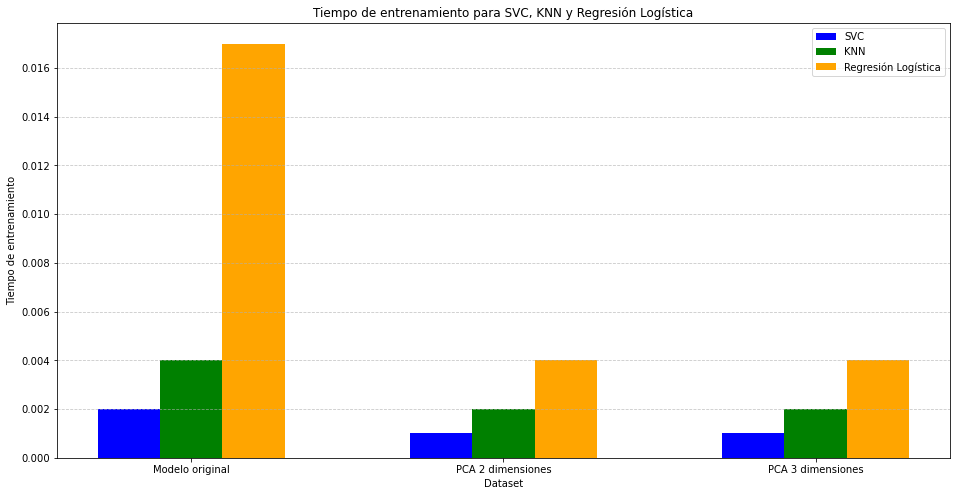

In [15]:
#Por último realizamos el mismo proceso con los tiempos de entrenamiento de cada uno de los modelos

print("Tiempo de entrenamiento para modelo SVC con el dataset original", round(training_times[0],4))
print("Tiempo de entrenamiento para modelo SVC con PCA 2 dimensiones", round(training_times[1],4))
print("Tiempo de entrenamiento para modelo SVC con PCA 3 dimensiones", round(training_times[2],4))
print("Tiempo de entrenamiento para modelo KNN con el dataset original", round(training_times[3],4))
print("Tiempo de entrenamiento para modelo KNN con PCA 2 dimensiones", round(training_times[4],4))
print("Tiempo de entrenamiento para modelo KNN con PCA 3 dimensiones", round(training_times[5],4))
print("Tiempo de entrenamiento para modelo regresion logística con el dataset original", round(training_times[6],4))
print("Tiempo de entrenamiento para modelo regresion logística 2 dimensiones", round(training_times[7],4))
print("Tiempo de entrenamiento para modelo regresion logística 3 dimensiones", round(training_times[8],4))


svc_time = training_times[:3]
knn_time = training_times[3:6]
logistic_time = training_times[6:]


plt.figure(figsize=(16, 8))


bar_width = 0.2
index = np.arange(3)


plt.bar(index, svc_time, bar_width, color='blue', label='SVC')
plt.bar(index + bar_width, knn_time, bar_width, color='green', label='KNN')
plt.bar(index + 2*bar_width, logistic_time, bar_width, color='orange', label='Regresión Logística')


plt.xlabel('Dataset')
plt.ylabel('Tiempo de entrenamiento')
plt.title('Tiempo de entrenamiento para SVC, KNN y Regresión Logística')


plt.legend()


plt.xticks(index + bar_width, ['Modelo original', 'PCA 2 dimensiones', 'PCA 3 dimensiones'])


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Aquí nos encontramos con una decisión, si bien la regresión logística se mostró como  el modelo mas consistente y con métricas mas favorables, el tiempo de entrenamiento representa un factor a tener en cuenta.

En un dataset pequeño como el que usamos puede ser que este factor no tenga mayo relevancia pero si trabajamos con muchos mas datos podemos ver que sin usar ningún metodo de PCA el tiempo de ejecución se triplica respecto al segundo modelo que mas tiempo toma (KNN)

Realizando la reducción de dimensionalidad podemos ver que la situación mejora, aún así el modelo de regresión logística duplica el tiempo de ejecución de otros modelos, en este caso dadas las métricas revisadas sería mejor optar por otro tipo de modelos como SVC que tuvo un comportamiento igual a la regresión logística en las métricas evaluadas.

### Pregunta 3

Utiliza Árboles de Decisión para graficar los parámetros más importantes del dataset escogido. Crea distintos árboles modificando los parámetros de modelo más importantes (como p.e. el max_depth, min_samples_leaf... y otros)

Graficar los resultados de al menos 4 árboles, optimizando distintos tipos de parámetros

In [44]:
#Cargamos el dataset en una variable
iris = load_iris()

#Asignamos los conjuntos de características "X" y de objetivo "y"
X = iris.data
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


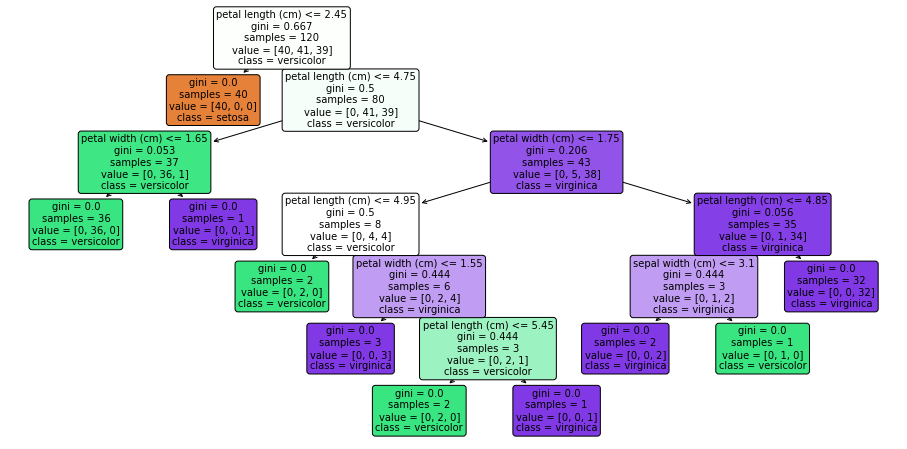

In [45]:
#Generamos nuestro arbol de decisión con hiperparámetros por defecto
tree_model = DecisionTreeClassifier(random_state=42)

#Entrenamos nuestro arbol de decisión
tree_model.fit(X_train, y_train)

#Graficamos el arbol de decisión
plt.figure(figsize=(16, 8))
plot_tree(tree_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()



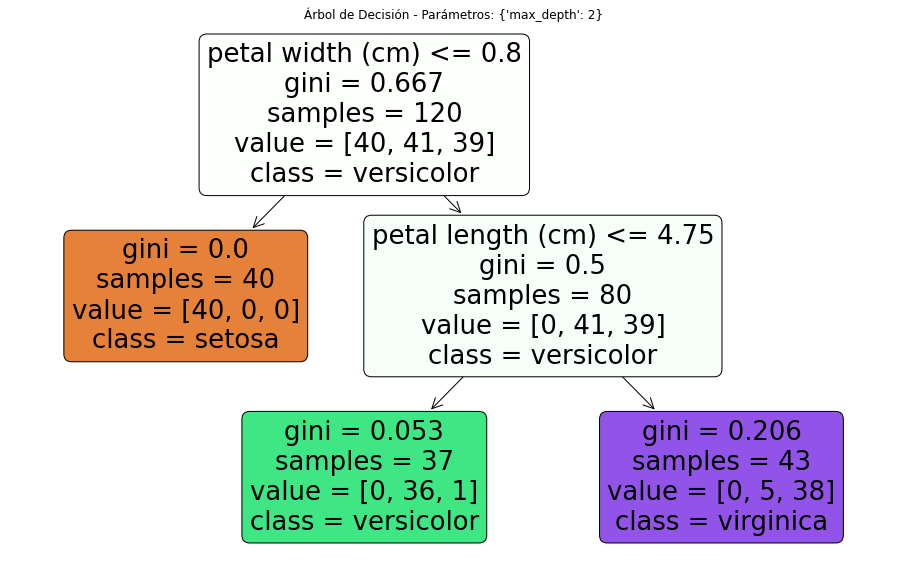

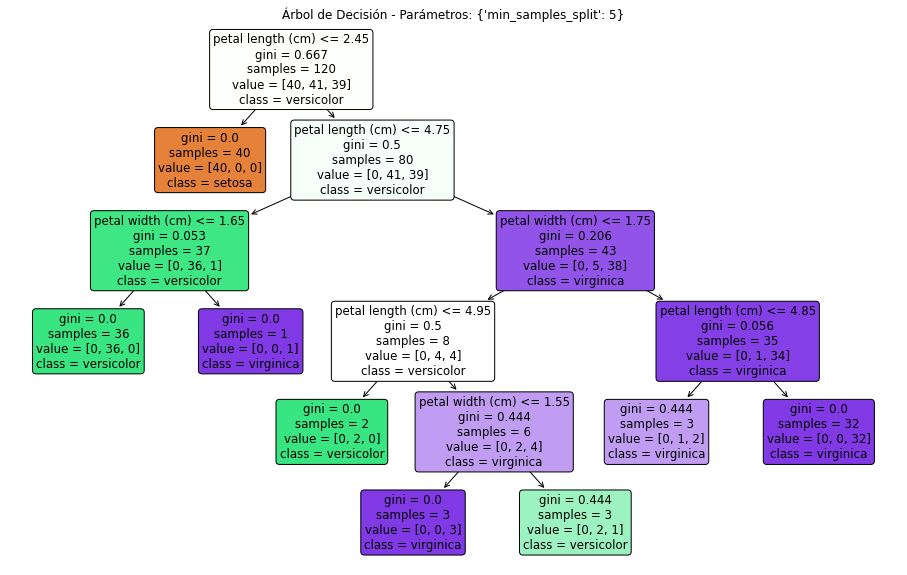

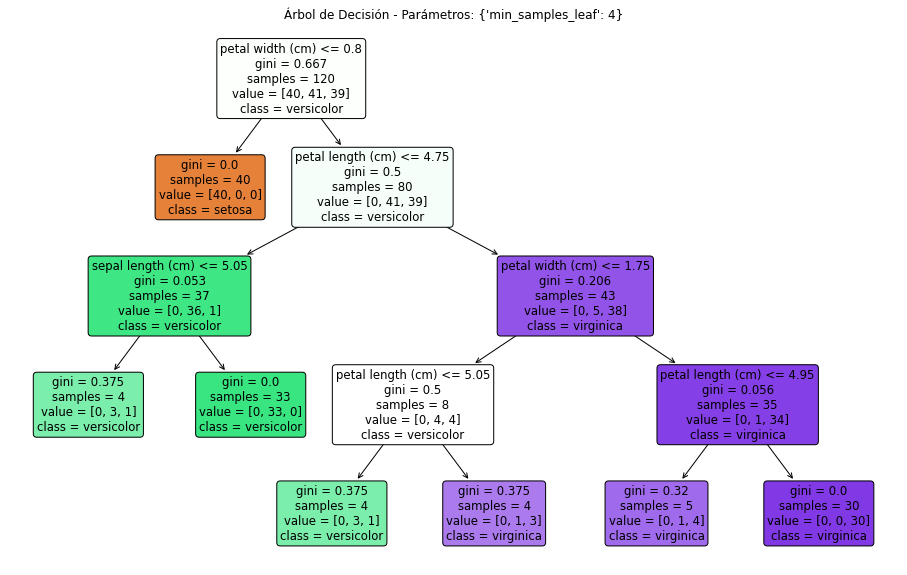

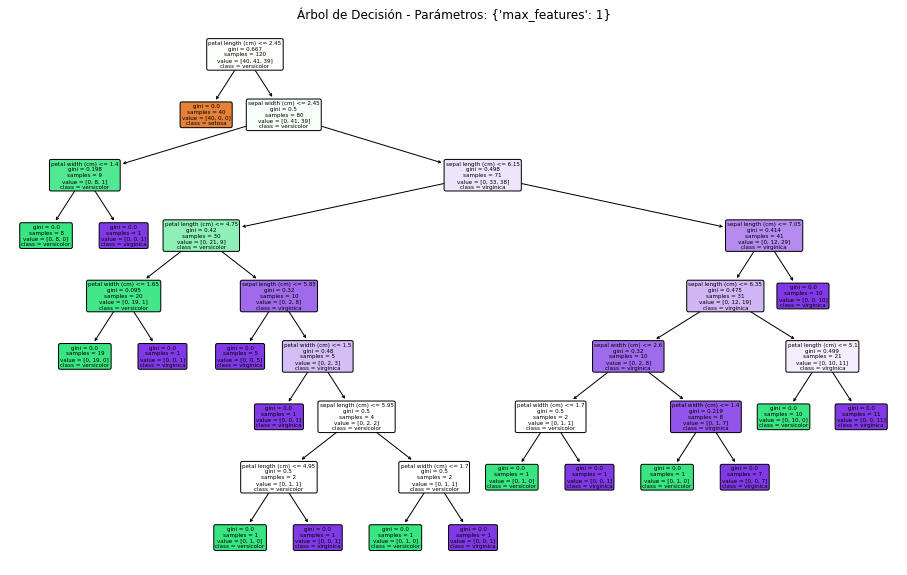

In [46]:
#Ahora vamos a crear distintos arboles de decisión para ver como se comporta con la modificación de hiperparámetros

#Primero creamos un diccionario para cada uno de los hiperparámetros que queremos probar para nuestro caso serán:
#max_depth: Controla la profundidad máxima del árbol.
#min_samples_split: Número mínimo de muestras requeridas para dividir un nodo interno.
#min_samples_leaf: Número mínimo de muestras requeridas en un nodo hoja.
#max_features: Número máximo de características a considerar al dividir un nodo.
parametros = [
    {'max_depth': 2},
    {'min_samples_split': 5},
    {'min_samples_leaf': 4},
    {'max_features': 1},
]

#Usamos un bucle for que va a iterar en los diferentes parámetros que establecimos y entrenar un arbol con ese hiperparámetro
for param in parametros:
    clf = DecisionTreeClassifier(**param)
    clf.fit(X_train, y_train)

    #Entrenado el arbol vamos a graficar cada uno para ver como afectan los hiperparámetros en su comportamiento
    plt.figure(figsize=(16, 10))
    plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
    plt.title(f'Árbol de Decisión - Parámetros: {param}')
    plt.show()

Como podemos ver, con la variación de un solo hiperparámetro la distribución de nuestro arbol sufre cambios drásticos, por ejemplo, en el primer arbol al solo tener dos niveles máximo vemos que muchos de los elementos quedan distribuidos en clases a las que no deberían pertencer ya que la profundidad del arbol no permite una clasificación mas profunda.

En el segundo arbol logramos una mayor profundidad pero tampoco logramos separar al 100% los elementos ya que el hiperparámetro señalado no le permite a nuestro arbol dividirse si tiene menos de 5 elementos en una de sus ramas

El tercer arbol tampoco logra separar completamente los elementos ya que tiene la restricción de tener mínimo 4 elementos en cada una de sus ramas por lo cual no logra dividirse nuevamente

Por último el 4 arbol si ligra dividir todos los elementos siendo muy específico ya que tiene como restricción que como máximo tiene en cuenta 1 característica para dividir un nodo, por lo tanto recorre una por una hasta que no queden características para realizar la división, aunque este es el mas específico no sería muy recomendable en datasets con demasiadas características porque consumiría demasiados recursos y además el arbol sería demasiado complejo

## Conjunto 2

El fichero datos_pago_microcreditos.csv contiene 30000 transacciones bancarias relativas al pago o impago de microcreditos. El dataset consta de 62 dimensiones propietarias de las cuales el banco no ha proporcionado informacion por confidencialidad, a parte de su valor. La matriz de entrada se encuentra en x_train, e y_train contiene la etiqueta relativa a esa transaccion, un 1 indica que si se pagó el microcredito y un 0 que no se pagó.

Considera que el tamaño del dataset es lo suficientemente grande como para, dependiendo de los recursos de la maquina, poder tardar varias horas en entrenar modelos complejos. Usando verbose=4 durante el fit para la optimización de parámetros podras ver el tiempo que tarda cada fit. El valor del parámetro "verbose" es un número entero que indica el nivel de detalle de la información que se desea mostrar durante el entrenamiento del modelo.

Ejecuta el código inicial para estandarizar los datos y contesta las siguientes preguntas.

In [47]:
data_file='datos_pago_microcreditos.csv'

pdl=pd.read_csv(data_file)

In [48]:
pdl["payment"]=np.where(pdl["payment"]=="Success",1,0)

k=pdl.columns

for col in k:
    if pdl[col].dtype=='object':
        temp=pd.get_dummies(pdl[col],drop_first=True,prefix=col)
        pdl=pd.concat([pdl,temp],axis=1)
        pdl.drop([col],axis=1,inplace=True)


pdl.dropna(axis=0,inplace=True)


In [49]:
pdl_train, pdl_test = train_test_split(pdl, test_size = 0.2,random_state=2)

#x_train=pdl_train.drop(["payment"],1)
x_train=pdl_train.drop(columns="payment")
y_train=pdl_train["payment"]

#x_test=pdl_test.drop(["payment"],1)
x_test=pdl_test.drop(columns="payment")
y_test=pdl_test["payment"]

x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

y_train

### Pregunta 4

Usando RandomSearchCV, identifica para un clasificador K-NN el numero de vecinos entre 1 y 30 que optimiza el resultado usando como scoring de la optimizacion el area bajo la curva (roc_auc) y con 10 folds para la validacion cruzada. Presenta los parametros optimos y evalúa el clasificador optimo con esos parámetros.

In [50]:
#Instanciamos el clasificador knn
knn = KNeighborsClassifier()

In [51]:
#Creamos la grilla de parámetros, en este caso vamos a generar un diccionario que genere un número de vecinos
#aleatorio para cada iteración
param_grid = {
    'n_neighbors': randint(1, 31)  # Número de vecinos entre 1 y 30
}

In [52]:
#Instanciamos el random search indicandole como parámetros el clasificador knn, la grilla que creamos previamente
#vamos a hacer 20 iteraciones del random search, usamos como métrica de evaluación el area bajo la curva, también
# realizaremos un cross validation con 10 folds 
random_search = RandomizedSearchCV(
    knn, param_distributions=param_grid, n_iter=20,
    scoring='roc_auc', cv=10, verbose=4, random_state=42, n_jobs=-1
)

In [53]:
#con el random search realizado vamos a entrenar con nuestros datos 
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029E711FC760>},
                   random_state=42, scoring='roc_auc', verbose=4)

In [54]:
#Una vez entrenado el modelo procedemos a ver cual fue el mejor parametro encontrado
print("Mejores parámetros encontrados:")
print(random_search.best_params_)

Mejores parámetros encontrados:
{'n_neighbors': 29}


In [55]:
#Ahora que sabemos cual es nuestro mejor estimador lo instanciamos en la variable best_knn
best_knn = random_search.best_estimator_

#Realizamos la predicción sobre el conjunto de prueba
y_pred = best_knn.predict(x_test)

#Evaluamos el area bajo la curva con la predicción y el conjunto de prueba
roc_auc = roc_auc_score(y_test, y_pred)

print("Área bajo la curva ROC (AUC) en el conjunto de prueba:", roc_auc)


Área bajo la curva ROC (AUC) en el conjunto de prueba: 0.6616386098889274


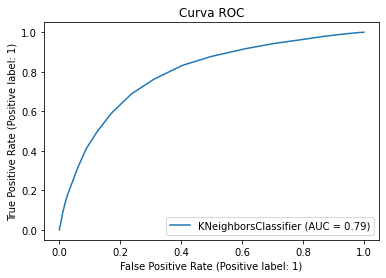

In [56]:
#Vamos a graficar la curva ROC
plot_roc_curve(best_knn, x_test, y_test)
plt.title('Curva ROC')
plt.show()


De acuerdo a nuestro desarrollo del ejercicio podemos ver que nuestro dandom serach encontró que el valor de vecinos optimo para el ejercicio es 29, esto despues de 200 pruebas correspondientes a 10 folds de 20 iteraciones realizadas.

Con este hiperparámetro vemos que el modelo tiene un valor de 0.6616 en la métrica de la curva ROC, esto nos quiere decir que el modelo generaliza un poco mejor que una selección aleatoria pero sigue sin ser un valor optimo, es posible que con un modelo mas complejo se logre mejorar este valor a través de la manipulación de los hiperparámetros

### Pregunta 5

Obten la matriz de confusión del clasificador optimo anterior. ¿cómo lees cada uno de los valores?¿qué valor de precision y recall tiene el clasificador optimizado con roc_auc?

In [69]:
#Instanciamos nuevamente nuestro clasificador knn
knn_classifier = KNeighborsClassifier(n_neighbors=29)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [70]:
# Realiza predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(x_test)

In [68]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[3430  332]
 [1317  921]]


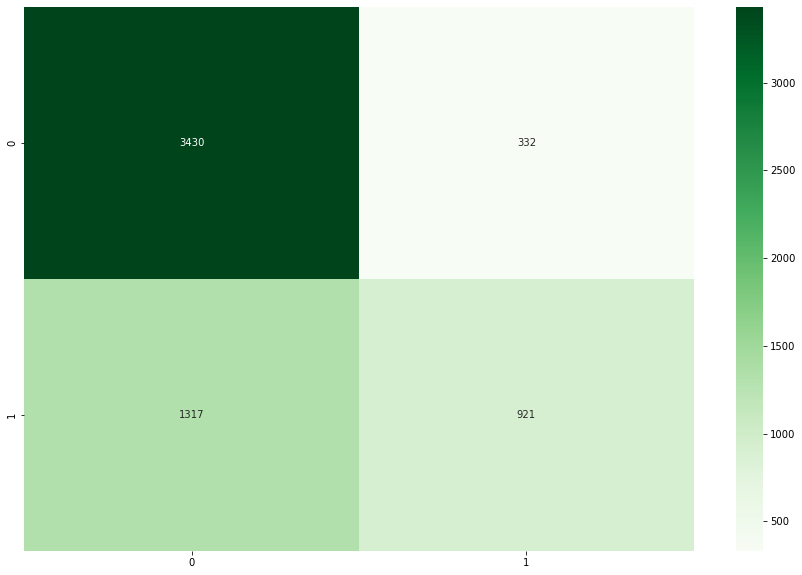

In [71]:
#Establecemos el tamaño de nuestro heatmap
fig, axes = plt.subplots(figsize=(15, 10))

#Creamos el heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
#Mostramos nuestros gráficos
plt.show()

En el anterior heatmap podemos ver la distribución de las predicciones, podemos motar que los verdaderos negativos son los que mejor clasificados se encontraron 3430 lo cual nos permite rastrear mejor los créditos impagos

Pero tambien podemos notar que los falsos negativos representan un valor alto de las predicciones en este caso la penalización por un falso negativo no resulta un inconveniente tan grande pues esto representaría un impago en el microcrédito que en realidad si se encuentra pagado lo que resultaría en una rectificación con el cliente como máximo pero confirmaríamos que en realidad se encuentra pagado.

En cuanto a los falsos positivos, es decir créditos que asumimos como pagados pero en realidad no lo están, proporcionalmente resultan bajos, lo cual para nuestro modelo resulta positivo ya que nos indica que la cantidad de casos en los cuales asumríamos que un credito está pagado cuando en realidad no lo está son pocos

Por último, comparativamente podemos ver que la relación entre falsos positivos y verdaderos positivos es de casi 1 a 3 por lo que podemos decir que tenemos al rededor del 75% de seguridad de que nuestro resultado positivo sea verdadero, algo que es un valor cercano a nuestra métrica de la curva ROC y tambien a la relación entre verdaderos negativos y falsos negativos

In [72]:
# Calcula la precisión y el recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precisión:", precision)
print("Recall:", recall)

Precisión: 0.7350359138068635
Recall: 0.41152815013404825


Vemos los resultados de las métricas de precision y recall, esto nos quiere decir que cuando nuestro modelo predice un valor como positivo acierta en el 73.50% de las ocasiones para ser exactos, lo cual se corresponde con nuestra matriz de confusión presentada previamente.

Por otro lado vemos que nuestro recall no es tan bueno como esperaríamos esto significa que del total de los valores positivos de nuestro conjunto de prueba el modelo solo logra identificar correctamente el 41.15% de ellas

### Pregunta 6

Identifica para el mismo problema los valores optimos de un clasificador SVC que use el kernel rbf usando el area bajo la curva como métrica. Ten en cuenta que hacer el fit de cada fold de SVC es mucho mas costoso computacionalmente que con KNN.

In [73]:
#Vamos a generar un pipeline que aplique un PCA y despues un modelo SVC con kernel rbf
pipeline = Pipeline([('pca', PCA()),('svc', SVC(kernel='rbf'))])

In [74]:
#Como vamos a hacer nuevamente una bisqueda aleatoria creamos la grilla que va a servir para este fin, le pedimos que
#que el PCA se haga con 10 componentes, le damos los valoes de C y de gamma
param_dist = {
    'pca__n_components': [10],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.1, 0.01, 0.001],}

In [75]:
#Con nuestros requisitos para el random search vamos a aplicarlo
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, 
                                   scoring='roc_auc', cv=10, n_iter=10, verbose=4)

In [76]:
#Ajustemos el modelo a nuestros datos de entrenamiento
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END pca__n_components=10, svc__C=0.1, svc__gamma=0.1;, score=0.510 total time= 1.0min
[CV 2/10] END pca__n_components=10, svc__C=0.1, svc__gamma=0.1;, score=0.488 total time= 1.0min
[CV 3/10] END pca__n_components=10, svc__C=0.1, svc__gamma=0.1;, score=0.509 total time= 1.0min
[CV 4/10] END pca__n_components=10, svc__C=0.1, svc__gamma=0.1;, score=0.525 total time= 1.0min
[CV 5/10] END pca__n_components=10, svc__C=0.1, svc__gamma=0.1;, score=0.493 total time= 1.0min
[CV 6/10] END pca__n_components=10, svc__C=0.1, svc__gamma=0.1;, score=0.508 total time= 1.0min
[CV 7/10] END pca__n_components=10, svc__C=0.1, svc__gamma=0.1;, score=0.490 total time= 1.0min
[CV 8/10] END pca__n_components=10, svc__C=0.1, svc__gamma=0.1;, score=0.505 total time= 1.0min
[CV 9/10] END pca__n_components=10, svc__C=0.1, svc__gamma=0.1;, score=0.509 total time= 1.0min
[CV 10/10] END pca__n_components=10, svc__C=0.1, svc__gamma=0.1;, score=0.5

[CV 6/10] END pca__n_components=10, svc__C=10, svc__gamma=0.001;, score=0.497 total time= 1.8min
[CV 7/10] END pca__n_components=10, svc__C=10, svc__gamma=0.001;, score=0.512 total time= 1.9min
[CV 8/10] END pca__n_components=10, svc__C=10, svc__gamma=0.001;, score=0.488 total time= 1.8min
[CV 9/10] END pca__n_components=10, svc__C=10, svc__gamma=0.001;, score=0.520 total time= 1.9min
[CV 10/10] END pca__n_components=10, svc__C=10, svc__gamma=0.001;, score=0.504 total time= 1.9min


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('pca', PCA()), ('svc', SVC())]),
                   param_distributions={'pca__n_components': [10],
                                        'svc__C': [0.1, 1, 10],
                                        'svc__gamma': [0.1, 0.01, 0.001]},
                   scoring='roc_auc', verbose=4)

In [77]:
#Una vez terminado el entrenamiento vamos a mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(random_search.best_params_)

Mejores parámetros encontrados:
{'svc__gamma': 0.001, 'svc__C': 0.1, 'pca__n_components': 10}


In [78]:
#Vamos a realizar las predicciones con nuestros mejores parámetros encontrados y obtenemos la métrica ROC AUC
y_pred = random_search.predict(x_test)
auc_score = roc_auc_score(y_test, y_pred)
print("Área bajo la curva ROC (AUC) en el conjunto de prueba:", auc_score)


Área bajo la curva ROC (AUC) en el conjunto de prueba: 0.5


In [79]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[3762    0]
 [2238    0]]


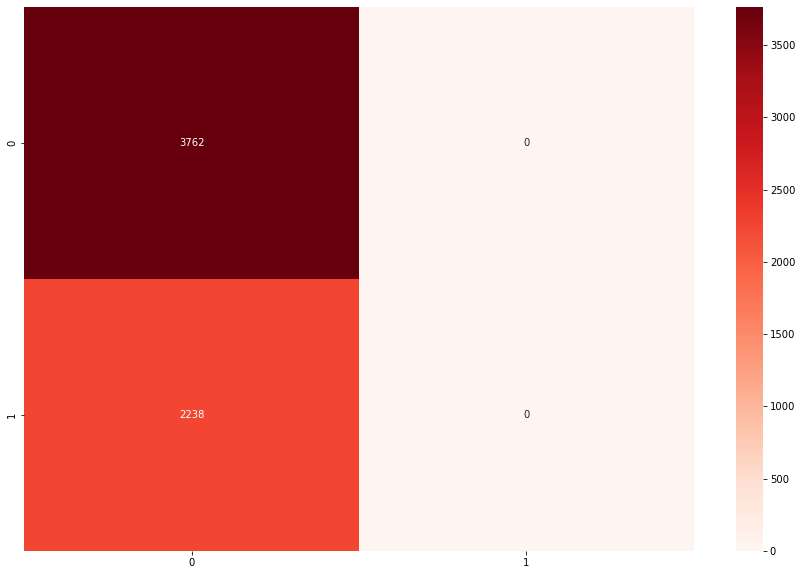

In [84]:
#Establecemos el tamaño de nuestro heatmap
fig, axes = plt.subplots(figsize=(15, 10))

#Creamos el heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
#Mostramos nuestros gráficos
plt.show()

En este heatmap podemos notar que si bien encontramos unos parámetros que fueron óptimos, lo cierto es que tanto en la métrica del area bajo la curva como en la matríz de confusión arrojan resultados que no se pueden considerar satisfactorios puesto que el modelo solo acierta la mitad de las ocasiones, y tampoco identifica ningún resultado como positivo ya que solo muestra verdaderos negativos y falsos negativos 

### Pregunta 7

GradientBoostingClasifier es uno de los métodos de scikitlearn que suele producir resultados bastante adecuados. Implementa un clasificador utilizando GradientBoostingClasifier considerando 0.05, 0.1, 0.15, 0.2, 0.25, 0.3 como learning rate.¿qué learning rate produce un resultado optimo usando roc_auc?

In [85]:
#Establecemos los learning rates para nuestra grilla
learning_rates = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

In [86]:
#Ahora creamos un diccionario con los learning rates escogidos y lo guarnamos en la variable param_grid
param_grid = {'learning_rate': learning_rates}

In [87]:
#Inicializamos el clasificador
clf = GradientBoostingClassifier()

In [88]:
#Con el clasificador instanciado y la param_grid creada vamos a realizar el gr id search para encontrar los mejores parámetros
grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=10)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]},
             scoring='roc_auc')

In [89]:
#Veamos el mejor learning rate que encontró el clasificador
print("Mejor learning rate encontrado:", grid_search.best_params_['learning_rate'])

Mejor learning rate encontrado: 0.15


In [90]:
#Evaluemos con la métrica del area bajo la curva ROC con los mejores parámetros encontrados
y_pred = grid_search.predict(x_test)
auc_score = roc_auc_score(y_test, y_pred)
print("Área bajo la curva ROC (AUC) en el conjunto de prueba:", auc_score)


Área bajo la curva ROC (AUC) en el conjunto de prueba: 0.8550105257456746


In [91]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[3404  358]
 [ 436 1802]]


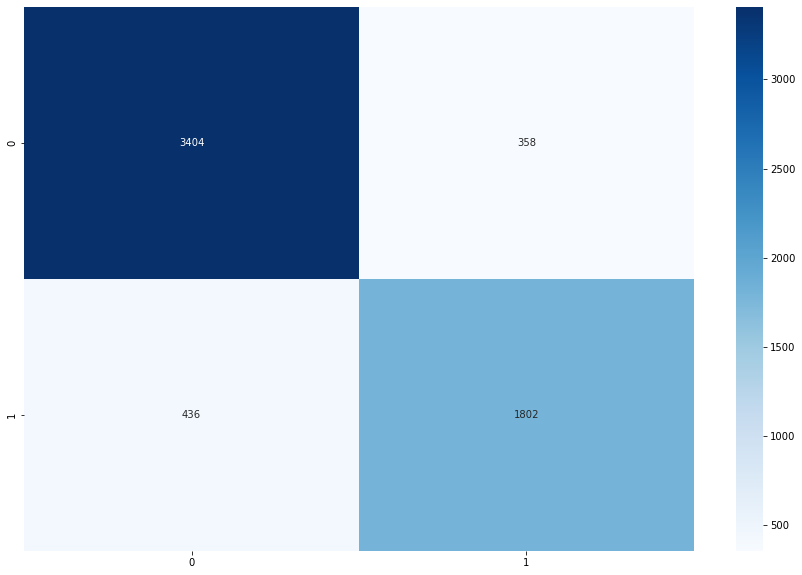

In [93]:
#Establecemos el tamaño de nuestro heatmap
fig, axes = plt.subplots(figsize=(15, 10))

#Creamos el heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
#Mostramos nuestros gráficos
plt.show()

Este último heatmap nos da una idea del comportamiento del modelo, en este caso tenemos una matríz de confusión mucho mejor que las dos vistas previamente, siendo la proporción de instancias clasificadas correctamente mucho mayor, aunque también tiene resultados mal clasificados estos representan porcentajes bajos respecto a su grupo original y la métrica del area bajo la curva tambíen es un indicador de que nuestro modelo tiene un desempeño mayor a los dos anteriores

### Pregunta 8

Usando la matriz de confusión de los tres casos y utilizando las métricas que te parezcan oportunas ¿qué clasificador de los 3 seleccionarias y por qué?

En este caso vamos a volver a ver nuestras matrices de confusión:

<center> MODELO KNN </center>

| |0   |1  |
|-|----|---|
|0|3430|332|
|1|1317|921|


<center> MODELO SVC </center>

| |0   |1  |
|-|----|---|
|0|3762|  0|
|1|2238|  0|


<center> MODELO GRADIENT BOOST CLASSIFIER </center>

| |0   |1  |
|-|----|---|
|0|3404|332 |
|1|436 |1802|


Teniendo en cuenta esto y también las métricas de area bajo la curva ROC podemos ver que el modelo que peor desempeño tuvo fue el SVC, seguido del KNN pero el que verdaderamente destacó en este ejercicio es el modelo gradient boost classifier ya que su métrica y su matriz de confusión fueron superiores a las de los demás modelos y por tanto se debería seleccionar este último para continuar con otros pasos que nos permitan refinar el modelo para tratar de obtener un mejor rendimiento.

## Conjunto 3

El dataset winequality-red.csv es un dataset que contiene para los vinos de la denominación de origen Minho una serie de métricas donde se caracterizan diferentes tipos de vinos. Entre estos valores se encuentran el pH, su densidad, el nivel de alcohol o su calidad (de 1 a 6). En este ejercicio usaremos este dataset para probar diferentes técnicas de clustering

In [94]:
import warnings
warnings.filterwarnings('ignore')

myfile='winequality-red.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

In [95]:
wine

,Unnamed: 0,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Pregunta 9

Utilizando solo las columnas "sulphates","alcohol","pH", y usando KMeans identifica el numero optimo de clusters para el conjunto de datos utilizando la "inertia_" para medir la compacidad de los clusteres.

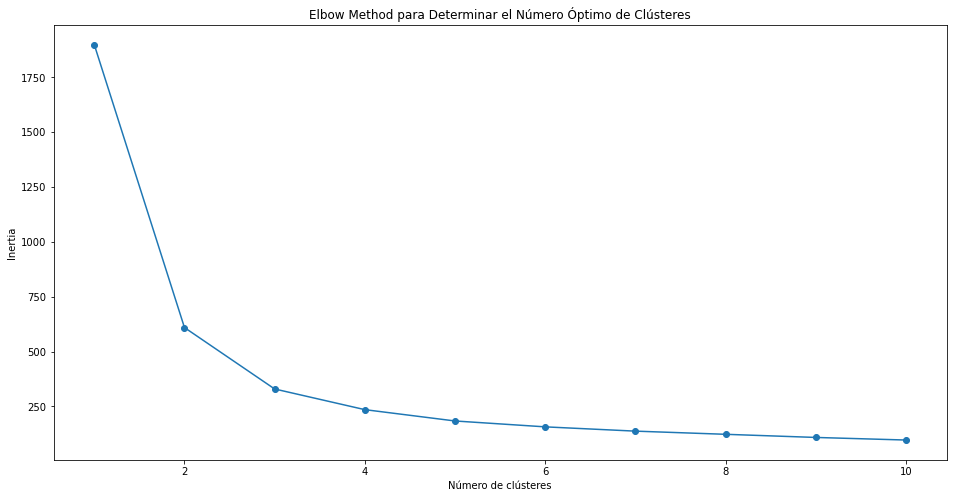

In [96]:
#Primero extraemos las columnas "sulphates","alcohol","pH" del dataset proporcionado
X = wine[["sulphates", "alcohol", "pH"]]

#Creamos una lista que almacene los valores de la inercia
inertia = []

#Vamos a iniciar un bucle for que se repita 10 veces
for k in range(1, 11):
    #Instanciamos el modelo Kmeans con el número de repetición en la que se encuentre el bucle for 
    kmeans = KMeans(n_clusters=k, random_state=42)
    #Con el modelo instanciado 
    kmeans.fit(X)
    #Obtenemos el valor de la incercia y lo agregamos a la lista creada
    inertia.append(kmeans.inertia_)

#Veamos la gráfica de codo para determinar cuando la curva empieza a aplanarse
plt.figure(figsize=(16,8))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inertia')
plt.title('Elbow Method para Determinar el Número Óptimo de Clústeres')
plt.show()


Podemos ver según el gráfico en con 4 clusteres la curva se empieza aplanar, por lo tanto podemos inferir que este sería nuestrp número optimo de clusteres.

Probemos si existe alguna diferencia si usamos datos normalizados

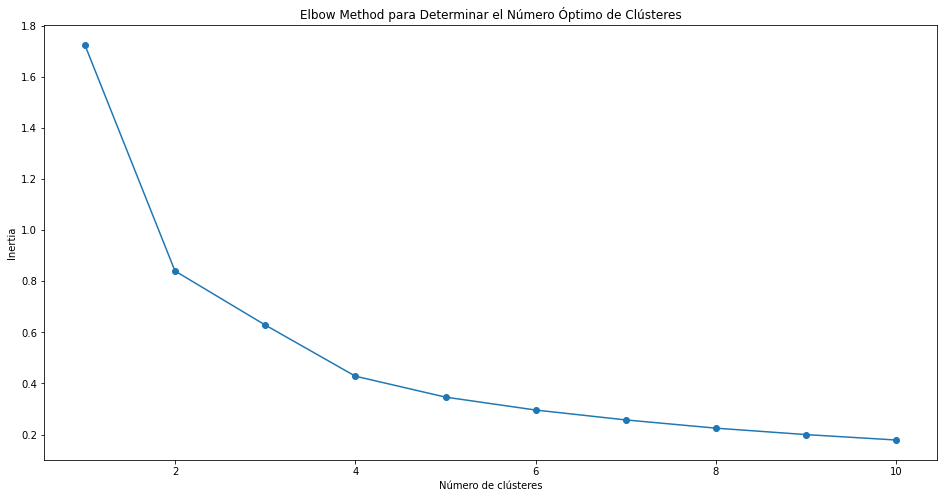

In [97]:
#Extraemos nuevamente nuestras columnas objetivo
X = wine[["sulphates", "alcohol", "pH"]]

#Instanciamos el normalizador
normalizer = Normalizer()

#Lo aplicamos a los datos X
X_n = normalizer.fit_transform(X)

#Creamos otra vez la lista vacia que almacene los datos de la inercia
inertia = []

#Usamos el mismo bucle for para probar varios números de clusteres
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_n)
    inertia.append(kmeans.inertia_)

#Volvemos a graficar la curva de codo para ver el comportamiento de la inercia con datos normalizados
plt.figure(figsize=(16,8))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inertia')
plt.title('Elbow Method para Determinar el Número Óptimo de Clústeres')
plt.show()


Vemos que con los datos normalizados la curva se ve mas suavizada en la parte del codo, pero de igual manera por el comportamiento de la curva podemos asumir que el numero de clusteres optimo es 4, por lo cual vamos a trabajar con este valor

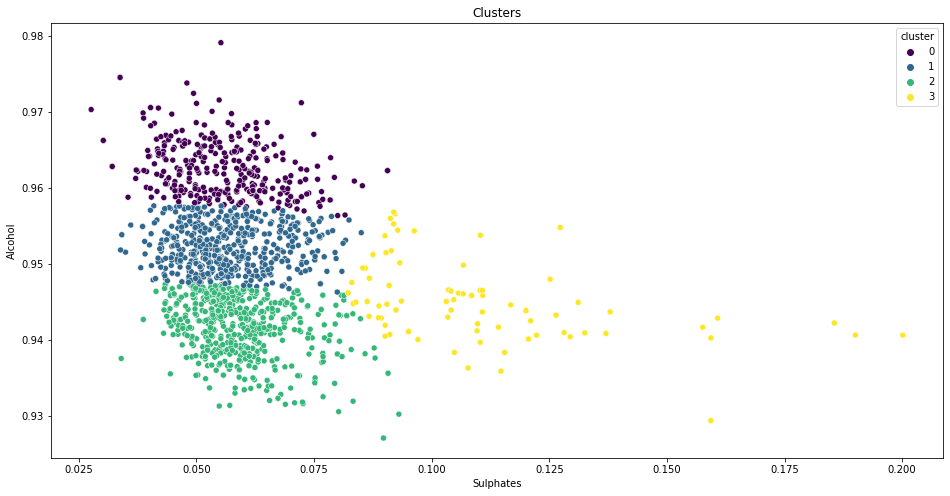

In [98]:
#Ahora representemos gráficamente la distribución de los clusteres
#Para esto instanciamos el modelo KMeans con el número de clusteres obtenido y entrenamos el modelo con los datos
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_n)

#Obtenemos los labels de el modelo
labels = kmeans.labels_

#Vamos a crear un dataframe que contenga los datos normalizados y les asigne los nombres de las features
df = pd.DataFrame(X_n, columns=['sulphates', 'alcohol', 'pH'])
#Agregamos una columna adicional que asigne el cluster de cada punto
df['cluster'] = labels

#Veamos los clusteres
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='sulphates', y='alcohol', hue='cluster', palette='viridis')
plt.title('Clusters')
plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.show()


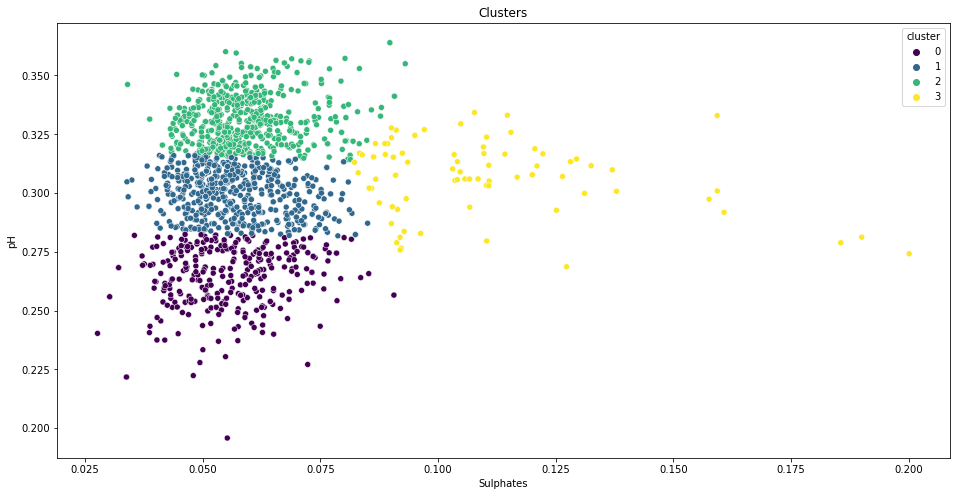

In [99]:
#Veamos nuevamente el gráfico pero esta vez con las columnas de sulphates y pH
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_n)

labels = kmeans.labels_

df = pd.DataFrame(X_n, columns=['sulphates', 'alcohol', 'pH'])
df['cluster'] = labels

plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='sulphates', y='pH', hue='cluster', palette='viridis')
plt.title('Clusters')
plt.xlabel('Sulphates')
plt.ylabel('pH')
plt.show()

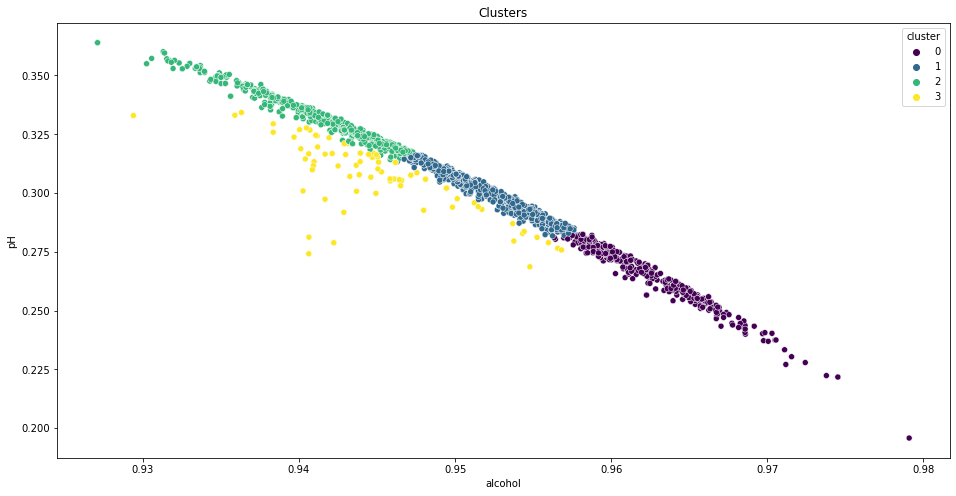

In [100]:
#Por ultimo veamos la combinación de alcohol y pH
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_n)

labels = kmeans.labels_

df = pd.DataFrame(X_n, columns=['sulphates', 'alcohol', 'pH'])
df['cluster'] = labels

plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='alcohol', y='pH', hue='cluster', palette='viridis')
plt.title('Clusters')
plt.xlabel('alcohol')
plt.ylabel('pH')
plt.show()

Podemos asumir que la decision de tomar 4 clusters resulta adecuada, ya que vemos claramente los 4 grupos separados por color en cada una de las combinaciones de características que realizamos.

Podemos notar que los dos primeros gráficos son muy similares en su distribucion de los puntos, un espejo podríamos decir pero el tercero es muy diferente, a pesar de que conserva la misma estructura de clusteres bien divididos.

Tambien podemos notar que el cluster etiquetado como 3 (el cuarto de ellos) conserva su estructura dispersa en los tres gráficos lo cual nos confirma que la distribucion de los clusters es consistente

### Pregunta 10

Usando los "cluster_centers_" del clustering optimo. ¿qué dicen estos representantes de clase de cada cluster? ¿cuáles son los valores de los indices de Davies-Bouldin y de Silhouette para este conjunto de clusters?

In [101]:
#Sigamos usando el número de clusters seleccionado
num_clusters = 4

#Instanciamos el modelo Kmeans con 4 clusteres
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_n)

#Vamos a extraer los centroides de los clusteres del modelo
centroides = kmeans.cluster_centers_
print("Centroides de los clústeres:")
print(centroides)

#Obtenemos el indice davies bouldin
db_score = davies_bouldin_score(X_n, kmeans.labels_)
print("Índice de Davies-Bouldin:", db_score)

#Obtenemos el indice de Silhouette
s_score = silhouette_score(X_n, kmeans.labels_)
print("Índice de Silhouette:", s_score)


Centroides de los clústeres:
[[0.05566072 0.96262627 0.26447881]
 [0.05682788 0.95210577 0.30011454]
 [0.05945756 0.94163406 0.33101139]
 [0.10867626 0.94506016 0.30682492]]
Índice de Davies-Bouldin: 0.7663265101204328
Índice de Silhouette: 0.415451712714148


Para este ejercicio tenemos como resultado un indice de Davies-Bouldin, que nos indica la separación entre clusteres y que tan cohesionados están entre si en cuestión de ditancia, en nuestro caso particular es de 0.7663 el cual a pesar de ser un poco alto nos indica que existe una división de los clusteres coherente tal cual como se vio en la representación gráfica.

Por otro lado el indice de Silhouette nos indica que tan bien se ajustan los puntos a su propio cluster y que tanto se diferencia de los demás, este indicé toma valores ente 1 indicando que el punto se encuentra bien ajustado a su propio cluster y -1 que es cluster es incorrecto, para nuestro caso en particular nos indica que en general los puntos se encuentran generalmente asignados de manera correcta a su propio cluster.

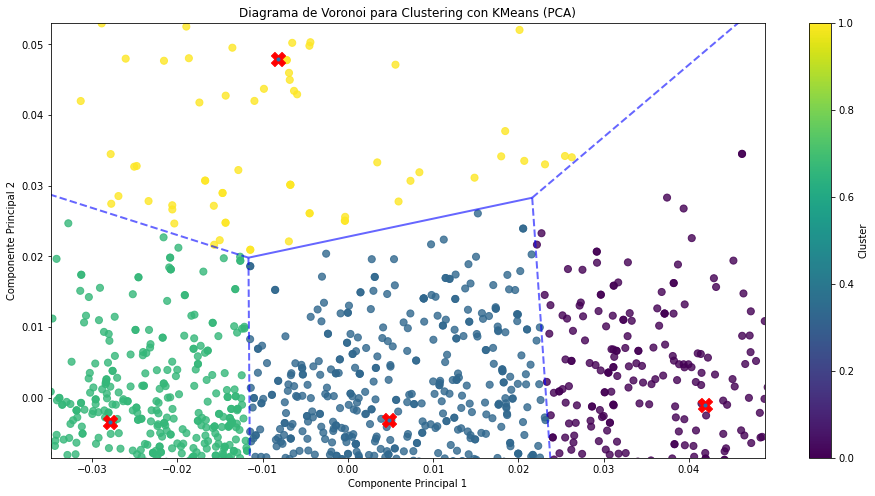

In [106]:
#Probemos cun diagrama de Voronoi para ver la distriución de los clusteres y confirmar los indices obtenidos
#Para hacer este gráfico necesitamos tener 2 dimensiones, para esto realizamos un PCA
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_n)

#Ya que tenemos dos dimensiones entrenamos el modelo Kmeans
kmeans.fit(X_pca)
centroids = kmeans.cluster_centers_

#Instanciamos el diagrama de voronoi
vor = Voronoi(centroids)

#Graficamos
fig, ax = plt.subplots(figsize=(16, 8))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='blue', line_width=2, line_alpha=0.6)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title('Diagrama de Voronoi para Clustering con KMeans (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()



Nuestro diagrama de Voronoi confirma nuestros gráficos y métricas anteriores, podemos observar los cuatro clusteres bien divididos, tres de ellos tienen una forma compacta lo cual nos indica una buena separacíon de los mismos, además la mayoría de sus puntos se encuentran compactos respecto a su centroide, a excepción del cluster amarillo el cual si muestra una figura irregular y una gran separación respecto a su centroide

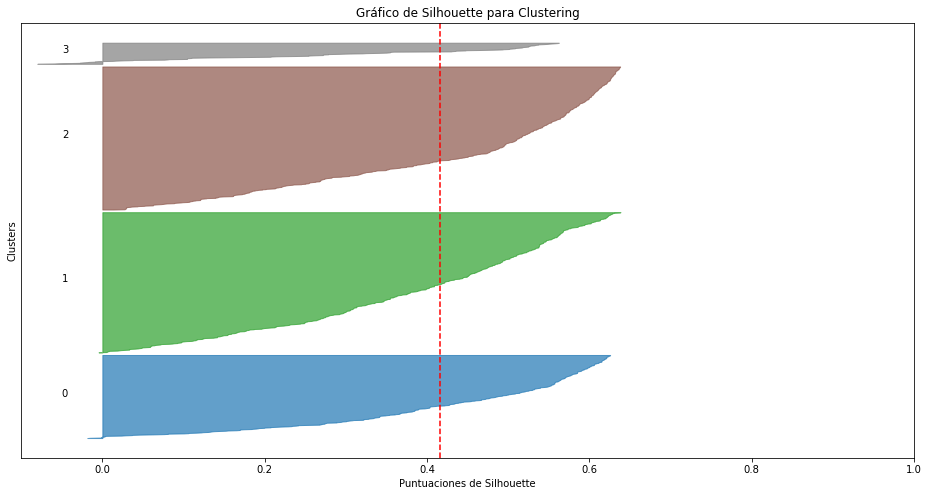

In [108]:

silhouette_scores = silhouette_samples(X_n, kmeans.labels_)
#Obtengamos el valor promedio del índice
silhouette_avg_score = silhouette_score(X_n, kmeans.labels_)

#Establezcamos el area del gráfico
fig, ax = plt.subplots(figsize=(16, 8))
y_lower = 10
#Creamos un bucle for que itere a través de cada uno de los clusteres
for i in range(4):
    #Vamos a seleccionar la puntuación que corresponde a cada uno de los clusters
    silhouette_values = silhouette_scores[kmeans.labels_ == i]
    #Ordenamos las puntuaciones en orden ascendente para obtener la figura del gráfico
    silhouette_values.sort()
    #Ahora obtenemos el número de elementos que pertenecen a el cluster que estamos iterando 
    size_cluster_i = silhouette_values.shape[0]
    #Establecemos la barra superior de la gráfica sumandole el tamaño del cluster obtenido antes
    y_upper = y_lower + size_cluster_i
    #Coloreamos cada uno de los clusteres y rellenamos cada espacio entre el valor inferior y superior de cada cluster
    color = plt.cm.tab10(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper),0, silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
    #Ponemos la etiqueta para cada cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    #Actualizamos el límite inferior del cluster aumentando 10 para generar un espacio
    y_lower = y_upper + 10

#Configuramos el gráfico añadiendo la linea del promedio del índice silhouette
ax.axvline(x=silhouette_avg_score, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_xlabel("Puntuaciones de Silhouette")
ax.set_ylabel("Clusters")
ax.set_title("Gráfico de Silhouette para Clustering")

plt.show()


En el anterior gráfico podemos observar lo que nos indica el índice de Silhouette para este caso podemos ver que los tres primeros clusteres se encuentran razonablemente clasificados pero en el último, que en los anteriors gráficos tenía color amarillo, podemos observar que su representación es la mas pobre de las trés lo que nos da a pensar que tal vez algunos de ellos no se encuentren bien clasificados

### Pregunta 11

Selecciona otro metodo de clustering que te parezca relevante e implementalo. ¿cómo se comparan los clusteres de este caso con los obtenidos en la Pregunta 1? Si tuvieras que elegir un cluster de los datos, ¿cual elegirías y por qué?

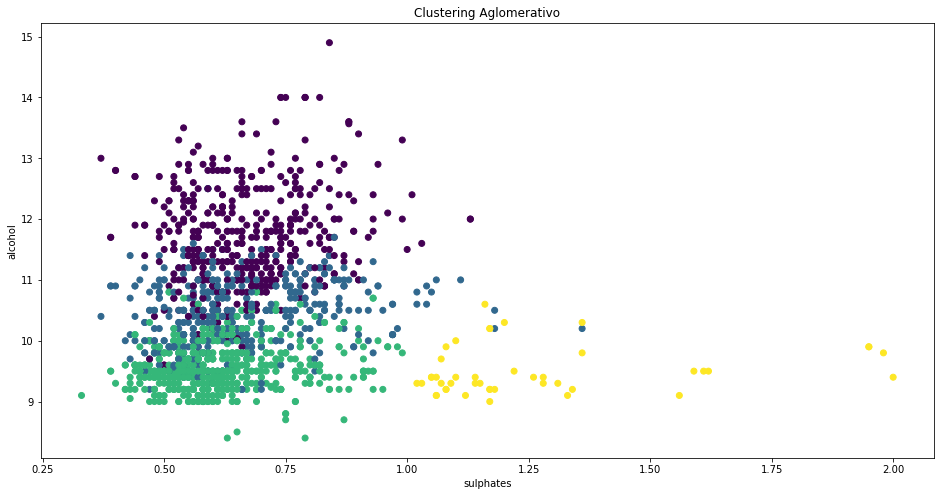

Índice de Silueta para Clustering Aglomerativo: 0.3506838552112523
Índice de Davies-Bouldin: 0.7663265101204328


In [109]:
#Para este ejercicio vamos a usar el agglomerative clustering como método alternativo, usaremos los mismos datos
#normalizados y el mísmo número de clusteres 
agglomerative_clustering = AgglomerativeClustering(n_clusters=4)
#Ya instanciado el clasificador vamos a entrenarlo con los datos 
agglomerative_labels = agglomerative_clustering.fit_predict(X_n)

#Ahora calculemos el índice de silhouette para este clasificador
silhouette_agglomerative = silhouette_score(X_n, agglomerative_labels)

#Tambien calculamos el indice Davies-Bouldin
db_score = davies_bouldin_score(X_n, kmeans.labels_)

#Graficamos los clusteres
fig, ax = plt.subplots(figsize=(16, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Clustering Aglomerativo')
plt.xlabel('sulphates')
plt.ylabel('alcohol')
plt.show()

print("Índice de Silueta para Clustering Aglomerativo:", silhouette_agglomerative)
print("Índice de Davies-Bouldin:", db_score)

Podemos ver que con este clasificador obtenemos un rendimiento menor que en los usados anteriormente, afirmamos esto debido a que gráficamente observamos que no existe una separación clara entre los clusters que se encuentran cercanos como en el kmeans.

Tambien vemos un deterioro en los índices de este clasificador respecto a los obtenidos en el clasificador kmeans, reduciendo el índice de silhouette y aumentando el de davies-bouldin lo cual indica un comportamiento peor del clasificador.

Dados estos elementos, considero que el clasificador que mejor comportamiento tuvo fue kmeans y es con el que deberíamos trabajar e intentar mejorar su comportamiento a través de la modificacíon de sus hiperparámetros por ejemplo.

## Conjunto 4

### Pregunta 12

El fichero hr_train.cvs contiene una tabla sobre los empleados de una empresa. Entre otros incluye información de su nivel de satisfacción, de la última evaluación obtenida, del numero de proyecto en el que se encuentra, del número medio de horas por semana, del número de años que lleva en la compañía, si ha tenido o no un accidente en el trabajo, si se ha ido (left) de la compañia, si ha tenido una promocion en los ultimos 5 años, y por último su nivel salarial (descrito como medio, alto o bajo) y el departamento en que se encuentra (sales/technnical ...)

#### El departamento de RRHH esta solicitando un clasificador que pueda predecir si alguien esta en riesgo de irse de la compañia para poder actuar  proactivamente. 

Notas:
- La columna "left" indica si alguien se ha ido de la compañia, es la "y" del problema.
- Las columnas "sales" y "salary" son alfanuméricas. La mayoría de clasificadores (aunque no todos) no trabajan bien con este tipo de variables y requieren valores numéricos. Dado el caso dispones de diferentes alternativas: (1) eliminar esas columnas y trabajar con el resto o (2) traducir esas columnas en columnas binarias - por ejemplo si "salary" tiene tres valores eliminar la columna original y sustituirla por tres columnas salary_low, salary_medium, salary_high donde se pondra un 1 en el tipo de salario y un 0 en las otras dos columnas restantes. Lo mismo para "sales", donde se transformara esa columna en tantas columnas como departamentos y un 1 en el departamento en que se encuentre el trabajador. Este es un preproceso muy tipico.

Nota de evaluación:

En este ejercicio más que el resultado final (que tambien) se evaluarán los pasos y el razonamiento utilizado en cada decisión que se toma para la implementación del modelo. 


In [132]:
import pandas as pd
import numpy as np

file1=r'hr_train.csv'

ci=pd.read_csv(file1)
ci.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium


In [133]:
ci.left.value_counts()

0    7424
1    3075
Name: left, dtype: int64

In [134]:
ci.salary.value_counts()

low       5104
medium    4515
high       880
Name: salary, dtype: int64

In [135]:
ci.sales.value_counts()

sales          2935
technical      1890
support        1556
IT              825
product_mng     639
marketing       614
hr              532
RandD           530
accounting      527
management      451
Name: sales, dtype: int64

In [136]:
#Veamos mas información de nuestro dataset
print(ci.info())

#Tambien mostremos los principales estadísticos
print(ci.describe())

#Por último veamos dentro de las variables categóricas cuales son cada una de ellas.
print(ci['sales'].unique())
print(ci['salary'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  int64  
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  int64  
 5   Work_accident          10499 non-null  int64  
 6   left                   10499 non-null  int64  
 7   promotion_last_5years  10499 non-null  int64  
 8   sales                  10499 non-null  object 
 9   salary                 10499 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 820.4+ KB
None
       satisfaction_level  last_evaluation  number_project  \
count        10499.000000     10499.000000    10499.000000   
mean             0.612683         0.717131        3.808553   
std         

In [137]:
#Vamos a copiar el dataset para no afectar el original y poder volverlo a ver mas adelante
ci_processed = ci.copy()

#Como tenemos variables categóricas tenemos dos opciónes, las podemos eliminar pero posiblemente perdamos información,
#por otro lado podemos transformarlas en dummy pero tambien incrementaríamos la carga de procesamiento del modelo,
#para este caso el tiempo de procesamiento no parece ser un problema por lo que optaremos por la segunda opción
label_encoders = {}
for col in ['sales', 'salary']:
    label_encoders[col] = LabelEncoder()
    ci_processed[col] = label_encoders[col].fit_transform(ci_processed[col])

#Ahora con nuestro dataset transformado separemos el objetivo de las características
X = ci_processed.drop(columns=['left'])
y = ci_processed['left']

#Con esto listo podemos dividir en conjunto de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:
#Empecemos probando con el modelo de clasificación de regresión logística, podemos usar este ya que tenemos solo dos salidas
#posibles por lo que es factible su uso

#Instanciamos y entrenamos el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

#Hacemos las predicciones
y_pred = model.predict(X_test)

#Veamos la precision del modelo, el reporte de clasificación y la matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud en el conjunto de prueba:", accuracy)

print("Reporte de clasificación en el conjunto de prueba:\n", classification_report(y_test, y_pred))
print("Matriz de confusión en el conjunto de prueba:\n", confusion_matrix(y_test, y_pred))


Exactitud en el conjunto de prueba: 0.6928571428571428
Reporte de clasificación en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80      1436
           1       0.54      0.20      0.29       664

    accuracy                           0.69      2100
   macro avg       0.63      0.56      0.55      2100
weighted avg       0.66      0.69      0.64      2100

Matriz de confusión en el conjunto de prueba:
 [[1323  113]
 [ 532  132]]


In [139]:
#Vemos que su rendimiento no es muy alto, intentemos mejorarlo con un grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'penalty': ['l1', 'l2']  # Tipo de regularización
}

#Instanciamos nuevamente el modelo de regresión logística
model = LogisticRegression()

#Con el modelo instanciado y nuestra grilla de parámetros establecida vamos a correr el grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Veamos los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

#Evaluemos el rendimiento del modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud en el conjunto de prueba con mejores parámetros:", accuracy)


Mejores parámetros encontrados: {'C': 0.1, 'penalty': 'l2'}
Exactitud en el conjunto de prueba con mejores parámetros: 0.6980952380952381


In [140]:
#Al parecer hubo una mejoría muy leve incluso buscando los mejores parámetros, revisemos métricas adicionales para 
#entender el comportamiento del modelo
y_pred = best_model.predict(X_test)

#Calculamos las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#Veamos las métricas
print("Exactitud en el conjunto de prueba:", accuracy)
print("Precisión en el conjunto de prueba:", precision)
print("Recall en el conjunto de prueba:", recall)
print("Puntuación F1 en el conjunto de prueba:", f1)
print("Área bajo la curva ROC (AUC) en el conjunto de prueba:", roc_auc)
print("Matriz de confusión en el conjunto de prueba:\n", conf_matrix)


Exactitud en el conjunto de prueba: 0.6980952380952381
Precisión en el conjunto de prueba: 0.5641025641025641
Recall en el conjunto de prueba: 0.19879518072289157
Puntuación F1 en el conjunto de prueba: 0.29398663697104677
Área bajo la curva ROC (AUC) en el conjunto de prueba: 0.5638822700271839
Matriz de confusión en el conjunto de prueba:
 [[1334  102]
 [ 532  132]]


In [141]:
#El modelo anterior no dio resultados satisfactorios, intentemos con un nuevo clasificador para ver si se ajusta mejor
#al problema, para esta ocasión usaremos el clasificador knn

#Instanciemos el clasificador
knn = KNeighborsClassifier()

#Creamos el espacio de hiperparámetros, que en este caso solo va a ser un número aleatorio de vecinos entre 1 y 30
param_dist = {'n_neighbors': randint(1, 31)}

#Para esto vamos a usar un random search cv ya que el único hiperparámetro es el número de vecinos
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20,scoring='roc_auc', cv=10, random_state=42,
                                   verbose=2, n_jobs=-1)

#Hacemos la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

#Mostramos los mejores parámetros
best_params = random_search.best_params_
print("Mejores parámetros encontrados:")
print(best_params)

#Evaluamos el area bajo la curva ROC para este modelo
y_pred_proba = random_search.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("Área bajo la curva ROC (AUC) en el conjunto de prueba:", auc_score)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores parámetros encontrados:
{'n_neighbors': 7}
Área bajo la curva ROC (AUC) en el conjunto de prueba: 0.802704550793704


In [143]:
#Este modelo tiene un rendimiento mas alto que el anterior, intentemos sacarle un poco mas usando la técnica de bagging con
#el mejor número de vecinos encontrados

#Instanciamos el clasificador con 7 vecinos
knn = KNeighborsClassifier(n_neighbors=7)

#Tomando como base el clasificador knn instanciamos el bagging classifier
bagging = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)

#Ajustamos el modelo con los datos de entrenamiento
bagging.fit(X_train, y_train)

#Realizamos las predicciones
y_pred = bagging.predict(X_test)

#Calculemos la precisión del modelo bagging
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Bagging:", accuracy)


Precisión del modelo de Bagging: 0.8085714285714286


Matriz de confusión:
 [[1260  176]
 [ 226  438]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1436
           1       0.71      0.66      0.69       664

    accuracy                           0.81      2100
   macro avg       0.78      0.77      0.77      2100
weighted avg       0.81      0.81      0.81      2100

Área bajo la curva ROC (AUC): 0.8031429338524012


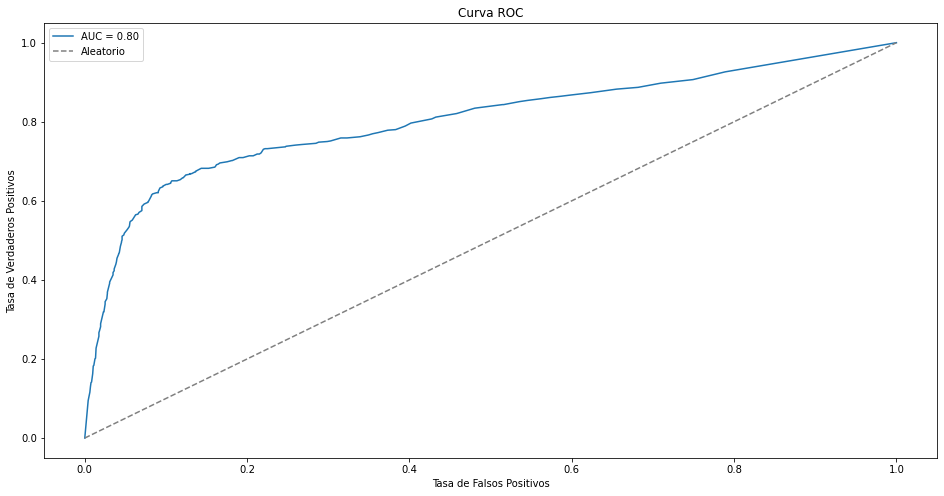

In [144]:
#La diferencia entre el modelo knn y el que tiene bagging no resulta muy significativa, veamos las métricas de este último
#Obtenemos la matriz de confusión
y_pred_bagging = bagging.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_bagging)
print("Matriz de confusión:\n", conf_matrix)

#Ahora el classification report
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_bagging))

#También la métrica del area bajo la curva ROC
y_pred_prob = bagging.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print("Área bajo la curva ROC (AUC):", auc_score)

#Grafiquemos el area bajo la curva ROC
plt.figure(figsize=(16, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [145]:
#Probemos un último modelo de clasificación, este último va a ser un modelo Random Forest
#Al igual que en los anteriores vamos a instanciar el modelo, con la particularidad de que vamos a tener 100 estimadores,
#y entrenamos el modelo con nuestros datos
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

#Hacemos las predicciónes
y_pred = rf_classifier.predict(X_test)

#Veamos la precision del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

#Obtenemos el classification report
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

#Vemos la matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión del modelo: 0.8609523809523809

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1436
           1       0.85      0.68      0.75       664

    accuracy                           0.86      2100
   macro avg       0.86      0.81      0.83      2100
weighted avg       0.86      0.86      0.86      2100

Matriz de Confusión:
[[1359   77]
 [ 215  449]]


In [146]:
#Este último modelo presenta unas buenas métricas por lo cual trabajaremos con este para hacer un grid search y ver si es 
#posible mejorar su rendimiento

#Nuevamente instanciamos nuestro Random Forest
rf_classifier = RandomForestClassifier()

#Ahora definamos nuestra grilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6]
}

#Corremos el grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Y entrenamos el modelo con los mejores hiperparámetro
grid_search.fit(X_train, y_train)

#Mostramos en pantalla los mejores hipoerparámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

#Extraemos el mejor modelo encontrado
best_rf_model = grid_search.best_estimator_

#Evaluamos el modelo con nuestros datos de prueba
accuracy = best_rf_model.score(X_test, y_test)
print("Exactitud del modelo en el conjunto de prueba:", accuracy)


Mejores parámetros encontrados:
{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
Exactitud del modelo en el conjunto de prueba: 0.8695238095238095


In [148]:
#Ahora que tenemos los mejores hiperparámetros veamos que nos dicen las demás métricas, para esto volvemos a entrenar
#el modelo pero con los resultados obtenidos en la celda anterior
rf_classifier = RandomForestClassifier(max_depth=30, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 400)
rf_classifier.fit(X_train, y_train)

#Hagamos predicciones con los datos de prueba
y_pred = rf_classifier.predict(X_test)

#Extraigamos nuestras métricas de precision, classification report y matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión del modelo: 0.87

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1436
           1       0.88      0.68      0.77       664

    accuracy                           0.87      2100
   macro avg       0.87      0.82      0.84      2100
weighted avg       0.87      0.87      0.86      2100

Matriz de Confusión:
[[1376   60]
 [ 213  451]]


De todos los modelos probados, este es el que muestra un mejor rendimiento, es importante notar como pasamos de 69.8% de precisión del modelo de regresión logística a un 87% con el modelo de random forest, esto muestra la importancia de realizar pruebas con varios modelos antes de continuar con el proceso, es cierto que esto se puede automatizar con un grid search indicandole los distintos modelos a probar pero para efectos de la prueba preferí realizar uno por uno.

Referente a los resultados obtenidos vemos que el 87% de las predicciones del modelo son correctas, en cuanto al recall tenemos una diferencia entre los casos del personal que se queda en la empresa los cuales los identifica muy bien pero no así del personal que tiene reisgo de salir de la empresa, por último el F1 score es un poco mas alentadora ya que presenta un valor mas alto para el segundo caso.

En este caso se debe trabajar para tratar de mejorar el rendimiento en los casos positivos pues en comparación con los negativos su rendimiento es menor.

In [147]:
#Con los resultados obtenidos queda la pregunta de ¿Cuales son las características mas relevantes de nuestros datos?
#hacemos esto para ver que datos tienen mas influencia en el modelo y para entender cuales tienen menos peso o resultan
#directamente irrelevantes de cara a una nueva iteración del modelo

#Volvamos a instanciar el modelo Random forest y lo ajustamos con los datos de entrenamiento
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

#Extraemos la importancia de las caracteristicas
feature_importance = rf_model.feature_importances_

#Para saber que valor corresponde a cada característica creamos un diccionario que tome como clave el nombre de la columna
#y como valor el resultado del cálculo de la importancia de las características
feature_importance_dict = dict(zip(X_train.columns, feature_importance))

#Vamos a ordenar la importancia de las características de forma descendente
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

#Mostramos en pantalla los resultados
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: satisfaction_level, Importance: 0.2932736623741822
Feature: average_montly_hours, Importance: 0.19610546126317777
Feature: last_evaluation, Importance: 0.16032074641313723
Feature: time_spend_company, Importance: 0.12459164919679115
Feature: number_project, Importance: 0.12440006888836534
Feature: sales, Importance: 0.058589914289023236
Feature: salary, Importance: 0.027088703192011905
Feature: Work_accident, Importance: 0.01198570517887026
Feature: promotion_last_5years, Importance: 0.0036440892044409235


Es muy interesante ver este tipo de métricas pues nos dan a entender algunas cosas interesantes por ejemplo como es obvio el nivel de satisfacción en la empresa es la carácterística más importante en lo que se refiere a la permanencia o no de las personas explicando el 29.32% de los cambios en la clasificación de nuetro modelo.

Algo que resulta contraintuitivo es que según nuestro reporte el salario no es un factor importante en para la permanencia de las personas en la empresa, moviendo solo un 2.70% de nuestro clasificador de un grupo a otro y de igual manera los ascensos en los últimos 5 años.

De hecho esto nos quiere decir que podríamos incluso eliminar las columnas work_accident y promotion_last_5years y no existiría un impacto significativo en el comportamiento del modelo, si bien perdemos información con esto, como podemos ver no resulta tan importante dentro de las predicciones pero puede mejorar el tiempo de procesamiento del modelo dependiendo de la cantidad de datos de nuestro dataset